**CONTEXTO**

---



KALBOARD360 es un learning management system (LMS) diseñado para facilitar el trabajo asincrónico de las escuelas. A través de este sistema, los profesores pueden tomar asistencia, distribuir exámenes y hojas de trabajo, crear debates y más.

El dataset utilizado a continuación fue obtenido de Kaggle y recoge información sobre estudiantes de dos semestres registrados en dicha plataforma. Se recopilan 245 estudiantes durante el primer semestre y 235 durante el segundo.



La información recolectada tiene que ver con el proceso del alumno durante el ciclo. Específicamente, contiene los siguientes datos:


*   Gender: género
*   Nationality: nacionalidad
*   Place of birth: lugar de nacimiento
*   Educational stage: etapa escolar 

    - Lower level
    - Middle school
    - High school
*   Grade Level: grado
*   Section ID: comisión
*   Topic: materia que cursa
*   Semester: semestre en el que fue obtenido su registro (first/second)
*   Parent responsible for student: padre encargado del seguimiento académico (father/mother) 
*   Raised hand: cantidad de veces que el alumno levantó la mano
*   Visited resources: cantidad de veces que el alumno visitó el contenido 
*   Viewing announcements: cantidad de veces que el alumno revisó los avisos
*   Discussion groups: cantidad de veces que el alumno participó en discusiones
*   Parent answering survey: (yes/no) si el padre responsable respondió la encuesta de satisfacción prevista por la escuela
*   Parent school satisfaction: (good/bad) valuación de la escuela por parte del padre.
*   Student absence days: días de ausencia
*   Class: clasificación de nivel según su nota
    - Low level (entre 0 y 69)
    - Middle level (entre 70 y 89)
    - High level (entre 90 y 100)

Mi objetivo final es hacer un modelo que prediga el nivel que alcanzaría un alumno dados sus atributos. 

Pienso que esta información serviría a los profesores y directivos de las escuelas para personalizar más la enseñanza y potenciar al máximo las capacidades de los alumnos. Si un alumno va camino a obtener un bajo rendimiento, entonces reforzarle extra. O si uno es un 100, entonces darle opciones desafiantes para mantenerlo motivado.

Un docente suele intuir eso según el compromiso que va observando, pero no vendría mal un método más preciso y basado en datos. 

El modelo sería una regresión logística porque es una clasificación. 

Sería "Class" mi variable target y consideraría como variables x todas las demás menos grade y classroom (me quedo con stage como más genérico)

Me interesa comprobar, en primer lugar, lo obvio: que si alguien no está activo en el curso su rendimiento será bajo. En un futuro también me interesan algunas comparaciones. Por ejemplo, ¿cambia el rendimiento entre dos alummnos que tienen todas las mismas características pero tienen distinta nacionalidad? ¿cambia si quien lo ayuda es la madre o el padre? ¿es un factor determinante el género?

**ÍNDICE**


---



1.   Carga de librerías
2.   Carga del dataset
3.   Shape
4.   Duplicados
5.   Faltantes
6.   Exploración
7.   Outliers y escalado
8.   Encoding
9.   Modelo y evaluación



**1) CARGA DE LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as no
import seaborn as sns
import matplotlib.pyplot as plt

**2) CARGA DEL DATASET**

In [2]:
students = pd.read_csv("/content/drive/MyDrive/xAPI-Edu-Data.csv")

In [3]:
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


**3) SHAPE**

In [4]:
print(f"En el dataset hay {students.shape[0]} filas y {students.shape[1]} columnas.")

En el dataset hay 480 filas y 17 columnas.


In [5]:
print(f"Los tipos de datos por columnas son: \n {students.dtypes}")

Los tipos de datos por columnas son: 
 gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object




```
No hay ningún cambio que hacer con respecto al tipo de datos
```



` * Renombro las columnas`



In [6]:
students.columns = ['Gender', 'Nationality', 'Place_of_Birth', 'Stage', 'Grade', 'Classroom', 'Topic', 'Semester', 'Responsible', 
                    'Raised_Hands', 'Visited_Resources', 'Checked_Announcements', 'Participation', 'Parent_Answering_Survey', 'Parent_School_Satisfaction', 
                    'Absence_Days', 'Reached_Level']

`* Elimino la columna Place_of_Birth porque me resulta suficiente con la Nationality`

In [7]:
students.drop(columns = ["Place_of_Birth"], inplace = True)

`* Reemplazo los valores de la columna Reached_Level para que sea más claro`

In [8]:
students['Reached_Level'] = students['Reached_Level'].map({'L':'Low', 'M':'Middle','H':'High'})

In [9]:
students.head()

,Gender,Nationality,Stage,Grade,Classroom,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Days,Reached_Level
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Middle
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Middle
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Low
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Low
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Middle


**4) DUPLICADOS**

In [10]:
print(f"Tenemos {students.duplicated().sum()} filas duplicadas")

Tenemos 2 filas duplicadas


In [11]:
students = students.drop_duplicates()
print(f"Ahora tenemos {students.duplicated().sum()} filas duplicadas")


Ahora tenemos 0 filas duplicadas


**5) ANÁLISIS DE FALTANTES**



```
Faltantes por columna:
```



In [12]:
students.isnull().sum()

Gender                        0
Nationality                   0
Stage                         0
Grade                         0
Classroom                     0
Topic                         0
Semester                      0
Responsible                   0
Raised_Hands                  0
Visited_Resources             0
Checked_Announcements         0
Participation                 0
Parent_Answering_Survey       0
Parent_School_Satisfaction    0
Absence_Days                  0
Reached_Level                 0
dtype: int64



```
Como no hay faltantes no hay ninguna imputación que hacer.
```



**6) EXPLORACIÓN**

**Género**

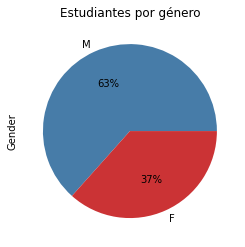

In [13]:
proporciones_generos = students.Gender.value_counts(normalize=True)
pie_generos = proporciones_generos.plot.pie(autopct='%1.0f%%', colors=["#477CA8","#CB3335"])
pie_generos.set_title('Estudiantes por género')
pie_generos



```
Hay más estudiantes hombres que mujeres
```



**Nationality**

Text(0.5, 1.0, 'Estudiantes por nacionalidad')

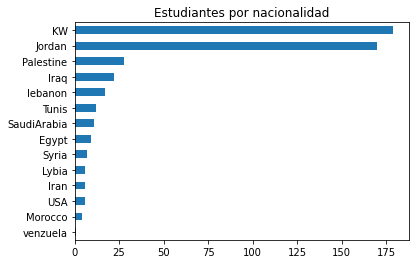

In [14]:
estudiantes_por_nacionalidad = students.Nationality.value_counts().sort_values()
barras_nacionalidades = estudiantes_por_nacionalidad.plot.barh()
barras_nacionalidades.set_title('Estudiantes por nacionalidad')




In [15]:
students[students.Nationality == "venzuela"]

,Gender,Nationality,Stage,Grade,Classroom,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Days,Reached_Level
62,M,venzuela,HighSchool,G-10,A,IT,F,Mum,80,90,70,80,Yes,Good,Under-7,High


In [16]:
#Kuwait tiene el máximo de estudiantes

**Stage**

In [17]:
students.Stage.value_counts()

MiddleSchool    248
lowerlevel      197
HighSchool       33
Name: Stage, dtype: int64

**Grade**

In [18]:
#La mayoría de los estudiantes de la plataforma están en Middle School. 
#Al menos en este momento, elijo quedarme con el stage genérico para tener un vistazo del rango etario y no ir al detalle del grade en específico

**Topics**

In [19]:
cantidad_de_topics = students.Topic.nunique()

In [20]:
cantidad_de_topics

12

In [21]:
students.Topic.value_counts()

IT           95
French       63
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

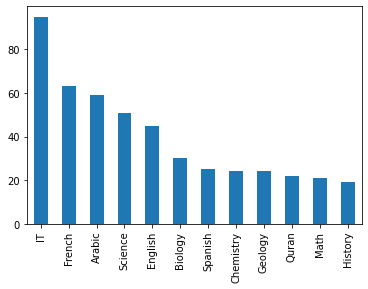

In [22]:
students.Topic.value_counts().plot.bar()

**Raised_Hands, Visited_Resources, Checked_Announcements, Participation**

In [23]:
students.describe().round()

,Raised_Hands,Visited_Resources,Checked_Announcements,Participation
count,478.0,478.0,478.0,478.0
mean,47.0,55.0,38.0,43.0
std,31.0,33.0,27.0,28.0
min,0.0,0.0,0.0,1.0
25%,16.0,20.0,14.0,20.0
50%,50.0,65.0,33.0,40.0
75%,75.0,84.0,58.0,70.0
max,100.0,99.0,98.0,99.0


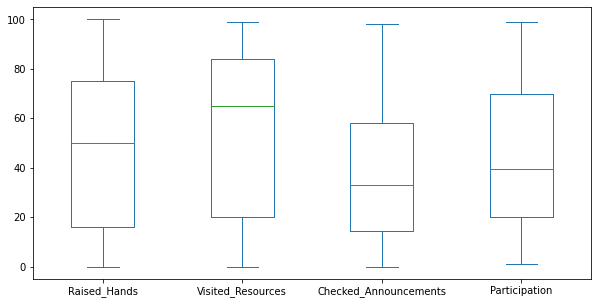

In [24]:
students.plot.box(figsize=(10,5))

In [25]:
#Están parejos

**7) ESCALADO**



```
Variables numéricas:
```



In [26]:
numericas = students.select_dtypes(exclude=['object']).columns
numericas


Index(['Raised_Hands', 'Visited_Resources', 'Checked_Announcements',
       'Participation'],
      dtype='object')



```
Creo el histograma y boxplot de cada variable. En función a su distribución y sus outliers eligo el método de escalado.
```



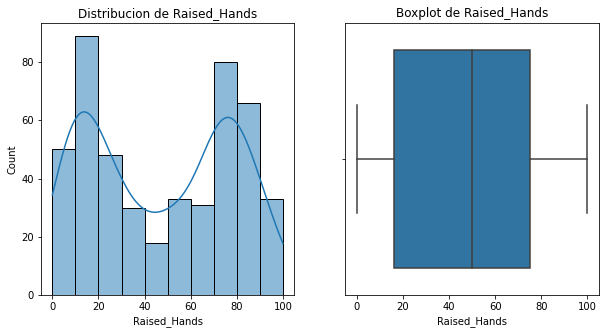

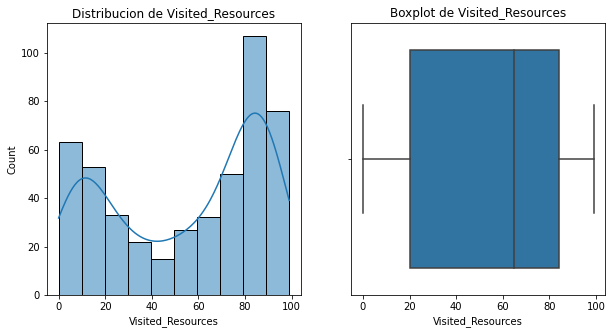

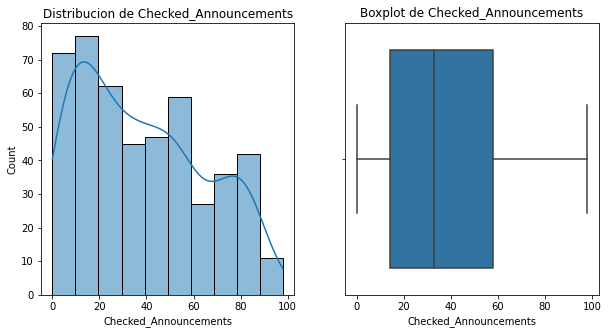

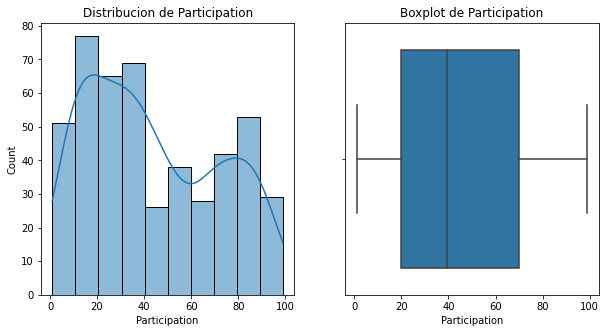

In [27]:
for variable in numericas:
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = students, x = f"{variable}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data = students, x = f"{variable}", ax=ax[1])



```
(Ninguna tiene outliers y ninguna tiene distribución normal)
```



In [28]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

for variable in numericas:
  students[variable]= minmaxscaler.fit_transform(students[[variable]])

students.head()


,Gender,Nationality,Stage,Grade,Classroom,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Days,Reached_Level
0,M,KW,lowerlevel,G-04,A,IT,F,Father,0.15,0.161616,0.020408,0.193878,Yes,Good,Under-7,Middle
1,M,KW,lowerlevel,G-04,A,IT,F,Father,0.20,0.202020,0.030612,0.244898,Yes,Good,Under-7,Middle
2,M,KW,lowerlevel,G-04,A,IT,F,Father,0.10,0.070707,0.000000,0.295918,No,Bad,Above-7,Low
3,M,KW,lowerlevel,G-04,A,IT,F,Father,0.30,0.252525,0.051020,0.346939,No,Bad,Above-7,Low
4,M,KW,lowerlevel,G-04,A,IT,F,Father,0.40,0.505051,0.122449,0.500000,No,Bad,Above-7,Middle


**8) ENCODING**



```
Variables categóricas:
```



In [29]:
categoricas = students.select_dtypes(['object']).columns
categoricas


Index(['Gender', 'Nationality', 'Stage', 'Grade', 'Classroom', 'Topic',
       'Semester', 'Responsible', 'Parent_Answering_Survey',
       'Parent_School_Satisfaction', 'Absence_Days', 'Reached_Level'],
      dtype='object')



```
Saco las que no voy a usar:
```



In [30]:
students.drop(columns = ["Grade", "Classroom"], inplace = True)
students

,Gender,Nationality,Stage,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Days,Reached_Level
0,M,KW,lowerlevel,IT,F,Father,0.15,0.161616,0.020408,0.193878,Yes,Good,Under-7,Middle
1,M,KW,lowerlevel,IT,F,Father,0.20,0.202020,0.030612,0.244898,Yes,Good,Under-7,Middle
2,M,KW,lowerlevel,IT,F,Father,0.10,0.070707,0.000000,0.295918,No,Bad,Above-7,Low
3,M,KW,lowerlevel,IT,F,Father,0.30,0.252525,0.051020,0.346939,No,Bad,Above-7,Low
4,M,KW,lowerlevel,IT,F,Father,0.40,0.505051,0.122449,0.500000,No,Bad,Above-7,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,MiddleSchool,Chemistry,S,Father,0.05,0.040404,0.051020,0.071429,No,Bad,Above-7,Low
476,F,Jordan,MiddleSchool,Geology,F,Father,0.50,0.777778,0.142857,0.275510,No,Bad,Under-7,Middle
477,F,Jordan,MiddleSchool,Geology,S,Father,0.55,0.747475,0.255102,0.285714,No,Bad,Under-7,Middle
478,F,Jordan,MiddleSchool,History,F,Father,0.30,0.171717,0.142857,0.571429,No,Bad,Above-7,Low




**Categóricas binary**




In [31]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
students['Gender'], students['Responsible'], students['Semester'], students['Parent_Answering_Survey'], students['Parent_School_Satisfaction'],students['Absence_Days']  = binary_encoder.fit_transform(students[['Gender', 'Responsible', 'Semester','Parent_Answering_Survey', 'Parent_Answering_Survey', 'Absence_Days']]).T



In [32]:
students.head()

,Gender,Nationality,Stage,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Days,Reached_Level
0,1.0,KW,lowerlevel,IT,0.0,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0,Middle
1,1.0,KW,lowerlevel,IT,0.0,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0,Middle
2,1.0,KW,lowerlevel,IT,0.0,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0,Low
3,1.0,KW,lowerlevel,IT,0.0,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0,Low
4,1.0,KW,lowerlevel,IT,0.0,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0,Middle


In [33]:
students.rename(columns = {"Absence_Days": "Absence_Under_7"}, inplace = True)
students.head()

,Gender,Nationality,Stage,Topic,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Under_7,Reached_Level
0,1.0,KW,lowerlevel,IT,0.0,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0,Middle
1,1.0,KW,lowerlevel,IT,0.0,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0,Middle
2,1.0,KW,lowerlevel,IT,0.0,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0,Low
3,1.0,KW,lowerlevel,IT,0.0,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0,Low
4,1.0,KW,lowerlevel,IT,0.0,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0,Middle


**Categoricas multi**



In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(students[['Nationality']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
nationality_encoded = ohe.transform(students[['Nationality']])

students[ohe.get_feature_names_out()] = nationality_encoded


students.drop(columns='Nationality', inplace = True)



[array(['Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia', 'Morocco',
        'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA', 'lebanon',
        'venzuela'], dtype=object)]

array(['Nationality_Egypt', 'Nationality_Iran', 'Nationality_Iraq',
       'Nationality_Jordan', 'Nationality_KW', 'Nationality_Lybia',
       'Nationality_Morocco', 'Nationality_Palestine',
       'Nationality_SaudiArabia', 'Nationality_Syria',
       'Nationality_Tunis', 'Nationality_USA', 'Nationality_lebanon',
       'Nationality_venzuela'], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(students[['Stage']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
stage_encoded = ohe.transform(students[['Stage']])

students[ohe.get_feature_names_out()] = stage_encoded


students.drop(columns='Stage', inplace = True)


[array(['HighSchool', 'MiddleSchool', 'lowerlevel'], dtype=object)]

array(['Stage_HighSchool', 'Stage_MiddleSchool', 'Stage_lowerlevel'],
      dtype=object)

In [36]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(students[['Topic']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
topic_encoded = ohe.transform(students[['Topic']])

students[ohe.get_feature_names_out()] = topic_encoded


students.drop(columns='Topic', inplace = True)
students

[array(['Arabic', 'Biology', 'Chemistry', 'English', 'French', 'Geology',
        'History', 'IT', 'Math', 'Quran', 'Science', 'Spanish'],
       dtype=object)]

array(['Topic_Arabic', 'Topic_Biology', 'Topic_Chemistry',
       'Topic_English', 'Topic_French', 'Topic_Geology', 'Topic_History',
       'Topic_IT', 'Topic_Math', 'Topic_Quran', 'Topic_Science',
       'Topic_Spanish'], dtype=object)

,Gender,Semester,Responsible,Raised_Hands,Visited_Resources,Checked_Announcements,Participation,Parent_Answering_Survey,Parent_School_Satisfaction,Absence_Under_7,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
0,1.0,0.0,0.0,0.15,0.161616,0.020408,0.193878,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.20,0.202020,0.030612,0.244898,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.10,0.070707,0.000000,0.295918,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.30,0.252525,0.051020,0.346939,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.40,0.505051,0.122449,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.0,1.0,0.0,0.05,0.040404,0.051020,0.071429,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.0,0.0,0.0,0.50,0.777778,0.142857,0.275510,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
477,0.0,1.0,0.0,0.55,0.747475,0.255102,0.285714,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
478,0.0,0.0,0.0,0.30,0.171717,0.142857,0.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Target**

In [37]:
from sklearn.preprocessing import LabelEncoder
students['Reached_Level'] = LabelEncoder().fit_transform(students['Reached_Level'])


**9) MODELO Y EVALUACIÓN**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = students.drop(columns=['Reached_Level'])
y = students['Reached_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [39]:
model = LogisticRegression(multi_class = "multinomial")
model.fit(X_train, y_train)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.7569444444444444




```
Podría ser mejor pero de todas maneras está bastante cerca de 1 así que es un buen modelo.
```



In [40]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[29  0 10]
 [ 0 31 11]
 [11  3 49]]



```
29, 31 y 49 son los predichos exitosamente
```

In [41]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))


[0.725      0.91176471 0.7       ]




```
Cercano a 1 así que buen modelo
```



In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        39
           1       0.91      0.74      0.82        42
           2       0.70      0.78      0.74        63

    accuracy                           0.76       144
   macro avg       0.78      0.75      0.76       144
weighted avg       0.77      0.76      0.76       144

